In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv["data"].shape
# Data is that we have just flated the image 400 images and image have 64 * 64 size, 64*64=4096 is representing the pixels.

(400, 4096)

In [5]:
oliv["images"].shape
# It means you have 400 images and image is 64 * 64.

(400, 64, 64)

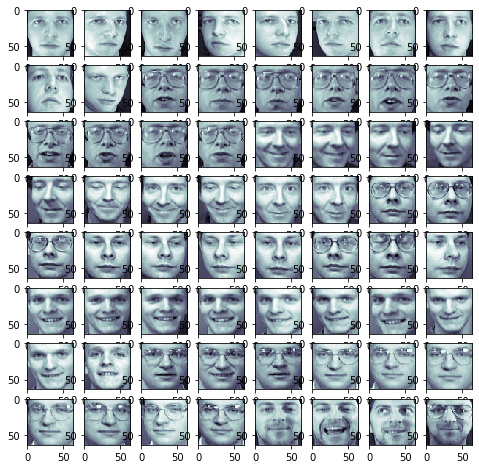

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    # We're saying that we want 8 rows and 8 coloumns with position i+1.
    # So we're taking 64 images out of 400.
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
    # cmap=plt.cm.bone this will change the theme or color.
plt.show()

In [7]:
# So by image we can see 1st 10 images are of same person and similiarly of other 40 persons.
# So basically this data is of 40 persons with 10 images of each person.

In [8]:
x = oliv.data
y = oliv.target
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.shape

(400, 4096)

In [10]:
# So we have 400 components and each component is of 4096 length.
# Bcoz acorrding to document its going to pick small dimension similarly it will pick 400 rather thazn 4096.

In [11]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while(currentSum/total < 0.95):
    currentSum += pca.explained_variance_[k]
    k += 1
k

123

In [13]:
pca = PCA(n_components=k, whiten=True)
# If we keep the whiten = Ture this basically means that we're kind of feature scaling the new components or they have same variance.
transformed_data = pca.fit_transform(x)

In [14]:
transformed_data.shape

(400, 123)

In [15]:
# 400 images.
# So from 4096 we have reached to 123 with 95% of variance.

In [16]:
# Lets get the images back
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [17]:
# Its no going to be the same data coz we drop some of the data
# To draw the image me need data in 64 * 64
x_approx_img = x_approx.reshape((400, 64, 64))

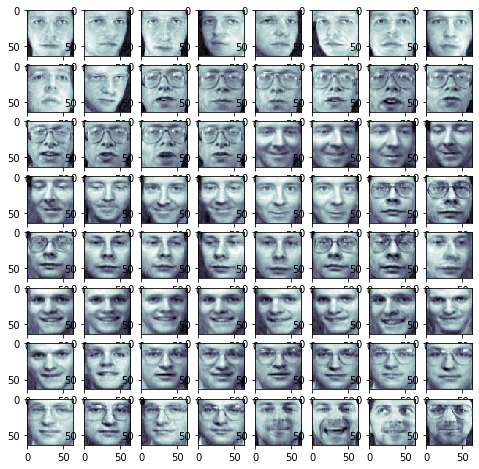

In [18]:
# So we're plotting the first 64 images that we have got from the approximated images.
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_img[i], cmap=plt.cm.bone)
plt.show()

In [19]:
# The image look very similar even after reducing the size from 4096 to 123.

In [20]:
# Eigenface
# So each component have 4096 values these 4096 is nothing but the pixels of the image.

In [21]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [22]:
eigenfaces = eigenv.reshape((k, 64, 64))

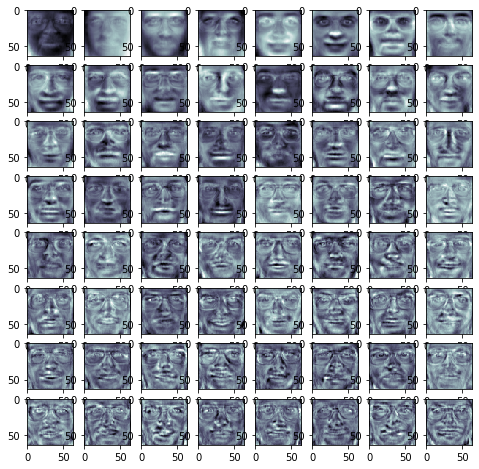

In [23]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i], cmap=plt.cm.bone)
plt.show()

In [24]:
# As we can see this not a random face its making some sense with the original images.
# That we called Eigen vector as EigonFaces coz its look like faces.
# Each component each representing some feature of the image like some of the component is focusing on glasses, no glasses, smile, eyes and etc.